# Assignment 4
## Tyler Trotter

Take a problem from a current or past statistics class (or class which used statistics) and do it in Scipy. 

Download a dataset from sklearn, scipy, Canvas, or anywhere on the internet. 

Take one or more numeric variables and plot its histogram and KDE plot. Looking at the KDE plot, make a guess what common distribution it might be (if any). 

Use a test to indicate whether it might be normal or some other distribution. 

Find the maximum of the KDE function using scipy.optimize (max(f) = - min(-f)).

In [115]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import poisson_means_test
from scipy import constants
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
from scipy.stats import normaltest

The problem I will do with Scipy is approximating Pi using a Monte-Carlo method after which we will assume it adheres to a distribution and employ the law of large numbers to re-iterate the Monte-Carlo method and find an average from random trials. 

Approximate value of π using 100000 dart throws: 3.13932


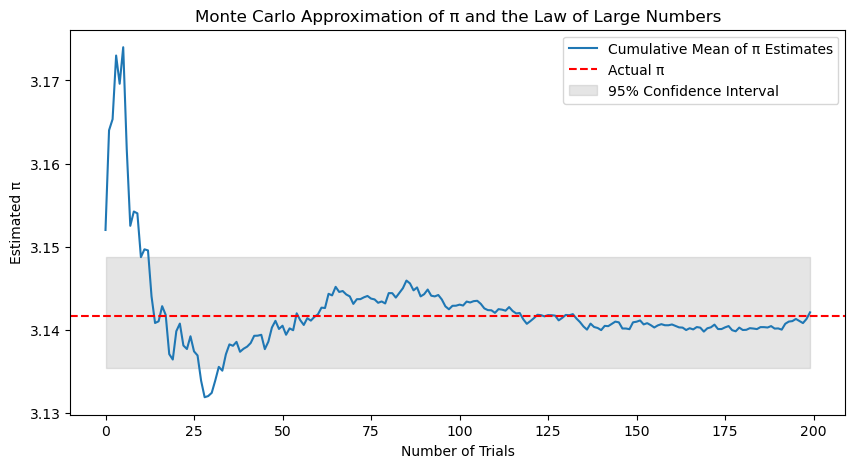

In [113]:
def monte_carlo_pi(n):
    x = stats.uniform.rvs(-1, 2, size=n)
    y = stats.uniform.rvs(-1, 2, size=n)
    circle = np.sum(np.power(x, 2) + np.power(y, 2) <= 1)
    pi_approx = (circle / n) * 4
    return pi_approx

n = 100000
pi_estimate = monte_carlo_pi(n)
print(f"Approximate value of Pi using {n} dart throws: {pi_estimate}")

num_trials = 200
n_per_trial = 1000
pi_estimates = np.asarray([monte_carlo_pi(n_per_trial) for _ in range(num_trials)])
cumulative_means = np.cumsum(pi_estimates) / np.arange(1, num_trials + 1)
confidence = 0.95
st_dev_err = stats.sem(pi_estimates)
confidence_interval = stats.t.interval(confidence, df=num_trials-1, loc=np.mean(pi_estimates), scale=st_dev_err)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(cumulative_means, label='Cumulative Mean of Pi Estimates')
plt.axhline(constants.pi, color='r', linestyle='dashed', label='Actual Pi')
plt.fill_between(np.arange(num_trials), confidence_interval[0], confidence_interval[1], color='gray', alpha=0.2, label=f'{confidence*100:.0f}% Confidence Interval')
plt.xlabel("Number of Trials")
plt.ylabel("Estimated Pi")
plt.title("Monte Carlo Approximation of Pi and the Law of Large Numbers")
plt.legend()
plt.show()


In [18]:
elon = pd.read_csv('D:\STAT 6969\elonmusk.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Tyler\AppData\Local\Temp\ipykernel_4520\1264925277.py:1: SyntaxWarning: invalid escape sequence '\S'
  elon = pd.read_csv('D:\STAT 6969\elonmusk.csv')


In [20]:
elon.shape

(12206, 11)

In [21]:
elon.head()

,Tweet,UserScreenName,UserName,Timestamp,text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Elon Musk,@elonmusk,2010-06-04T18:31:57.000Z,"Please ignore prior tweets, as that was someon...",NaN,873,648,"5,453",[],https://twitter.com/elonmusk/status/15434727182
1,1,Elon Musk,@elonmusk,2011-12-01T09:55:11.000Z,Went to Iceland on Sat to ride bumper cars on ...,NaN,30,24,188,['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr?...,https://twitter.com/elonmusk/status/1421799282...
2,2,Elon Musk,@elonmusk,2011-12-01T10:29:04.000Z,I made the volume on the Model S http://ow.ly/...,NaN,29,17,78,[],https://twitter.com/elonmusk/status/1421884581...
3,3,Elon Musk,@elonmusk,2011-12-03T08:20:28.000Z,"Great Voltaire quote, arguably better than Twa...",NaN,23,30,44,[],https://twitter.com/elonmusk/status/1428808713...
4,4,Elon Musk,@elonmusk,2011-12-03T08:22:07.000Z,That was a total non sequitur btw\n26\n14\n50,NaN,26,14,50,[],https://twitter.com/elonmusk/status/1428812840...


In [22]:
elon.columns

Index(['Tweet', 'UserScreenName', 'UserName', 'Timestamp', 'text', 'Emojis',
       'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL'],
      dtype='object')

In [42]:
elon.Likes = pd.to_numeric(elon.Likes, errors = 'coerce')

In [46]:
elon_likes = elon.Likes.fillna(0)

In [47]:
type(elon_likes[0])

numpy.float64

In [52]:
elon_likes_kde = gaussian_kde(elon_likes)

In [59]:
like_x = np.linspace(0, 1000, num=500)

<Axes: >

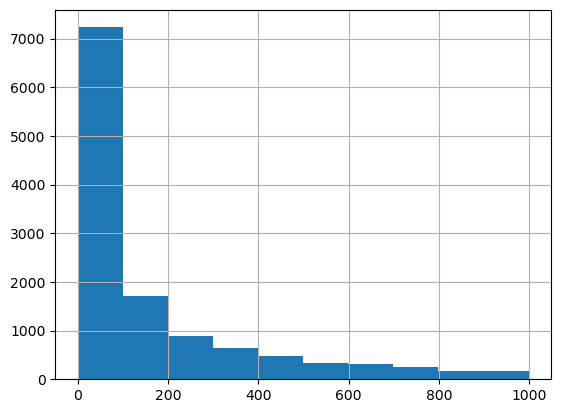

In [60]:
elon_likes.hist()

In [61]:
px.line(x = like_x, y = elon_likes_kde(like_x))

It looks as though it could be normal (if likes could go negative). Also, the histogram and KDE indicate it could be Poisson. Those are common distributions that seem to be working here. 

In [62]:
elon_likes.mean()

162.4981156808127

In [64]:
normaltest(elon_likes)

NormaltestResult(statistic=3832.4336703008153, pvalue=0.0)

In [74]:
observed_freq, _ = np.histogram(elon_likes, bins=np.arange(min(elon_likes)-0.5, max(elon_likes)+1.5, 1))
expected_freq = len(elon_likes) * stats.poisson.pmf(np.arange(min(elon_likes), max(elon_likes)+1), np.mean(elon_likes))
expected_freq = np.where(expected_freq == 0, 1e-11, expected_freq)
chi2_stat, p_value = stats.chisquare(observed_freq, f_exp=expected_freq)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Elon's likes do not follow a Poisson distribution")
else:
    print("Elon's likes may follow a Poisson distribution")


Chi-squared statistic: inf
P-value: 0.0
Elon's likes do not follow a Poisson distribution


Turns out, it is neither. . . 

In [ ]:
negative_elon_likes_kde = lambda x: -1 * elon_likes_kde(x)

In [105]:
minimize(negative_elon_likes_kde, 14)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.005204758499732404
        x: [ 1.400e+01]
      nit: 0
      jac: [-8.092e-06]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

It appears the maximum occurs right around x=14, after trying multiple x_0's, which roughly accords with the graph above. 